In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(trainingData, trainingLabels), (testingData, testingLabels) = fashion_mnist.load_data()


In [2]:
trainingData[0].shape, trainingLabels[0].shape

((28, 28), ())

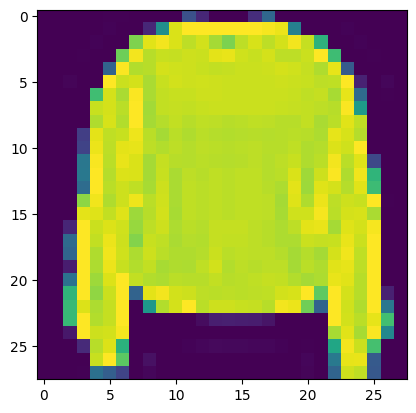

In [3]:
import matplotlib.pyplot as plt
plt.imshow(trainingData[7])

In [4]:
classNames = ["T-shirt/top", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle Boots"]
len(classNames)

10

Text(0.5, 1.0, 'Coat')

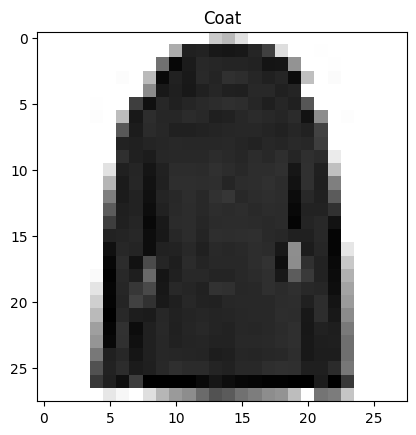

In [5]:
indexOfChoice = 2000
plt.imshow(trainingData[indexOfChoice], cmap = plt.cm.binary)
plt.title(classNames[trainingLabels[indexOfChoice]])

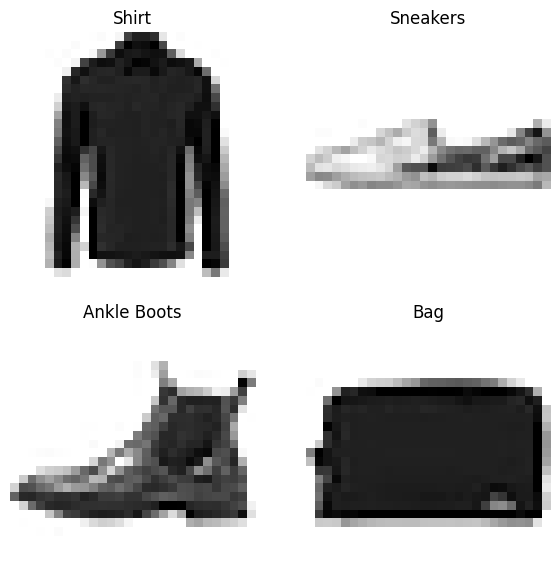

In [6]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2, i + 1)
    randomIndex = random.choice(range(len(trainingData)))
    plt.imshow(trainingData[randomIndex], cmap = plt.cm.binary)
    plt.title(classNames[trainingLabels[randomIndex]])
    plt.axis(False)

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation = "softmax")])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)
noneNormHistory = model.fit(trainingData, trainingLabels, epochs=100, validation_data=(testingData, testingLabels))

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 781us/step - accuracy: 0.7023 - loss: 1.9486 - val_accuracy: 0.8228 - val_loss: 0.5166
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 732us/step - accuracy: 0.8277 - loss: 0.4844 - val_accuracy: 0.8385 - val_loss: 0.4489
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.8457 - loss: 0.4354 - val_accuracy: 0.8189 - val_loss: 0.5004
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step - accuracy: 0.8552 - loss: 0.4051 - val_accuracy: 0.8500 - val_loss: 0.4152
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step - accuracy: 0.8643 - loss: 0.3829 - val_accuracy: 0.8349 - val_loss: 0.4319
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.8680 - loss: 0.3656 - val_accuracy: 0.8563 - val_loss: 0.3950
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8745 - loss: 0.3505 - val_accuracy: 0.8593 - val_loss: 0.3946
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.8776 - los

In [8]:
model.evaluate(testingData, testingLabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 272us/step - accuracy: 0.8769 - loss: 0.6122


[0.6639999151229858, 0.8790000081062317]

In [9]:
tf.random.set_seed(42)

modelTwo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
modelTwo.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
)
#learningRateScheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10 ** (epochs/20))
modelTwo.fit(trainingData, trainingLabels, epochs=100, validation_data=(testingData, testingLabels))

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 735us/step - accuracy: 0.6987 - loss: 3.7468 - val_accuracy: 0.7630 - val_loss: 0.7086
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.8050 - loss: 0.5734 - val_accuracy: 0.8002 - val_loss: 0.5787
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8279 - loss: 0.4932 - val_accuracy: 0.8292 - val_loss: 0.4708
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.8434 - loss: 0.4450 - val_accuracy: 0.8369 - val_loss: 0.4596
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step - accuracy: 0.8532 - loss: 0.4166 - val_accuracy: 0.8467 - val_loss: 0.4459
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8566 - loss: 0.3983 - val_accuracy: 0.8546 - val_loss: 0.4254
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.8636 - loss: 0.3794 - val_accuracy: 0.8526 - val_loss: 0.4235
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 

In [10]:
modelTwo.evaluate(testingData, testingLabels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.8754 - loss: 0.9485


[1.1993138790130615, 0.8745999932289124]